In [1]:
import numpy as np
import matplotlib.pyplot as plt

import itertools
import time
import os

import glob

import genetic_algo

from natsort import natsorted
from IPython.display import clear_output, display

from tqdm.auto import tqdm

from concurrent.futures import ProcessPoolExecutor, ThreadPoolExecutor

In [2]:
fblocks = np.array([
    [(0,0,0),(1,0,1),(2,0,0),(3,0,1),(4,0,0)],
    [(0,0,0),(1,0,1),(2,0,0),(2,-1,1),(1,1,0)],
    [(0,0,0),(1,0,1),(2,0,0),(0,1,1),(2,-1,1)],
    [(0,0,0),(1,0,1),(2,0,0),(-1,0,1),(0,-1,1)],
    [(0,0,0),(-1,0,1),(1,0,1),(0,1,1),(0,-1,1)],
    [(0,0,1),(1,0,0),(2,0,1),(0,1,0),(0,-1,0)],
    [(0,0,0),(1,0,1),(2,0,0),(3,0,1),(0,1,1)],
    [(0,0,0),(0,1,1),(2,0,0),(2,1,1),(1,1,0)],
    [(0,0,1),(1,0,0),(2,0,1),(0,1,0),(0,2,1)],
    [(0,0,1),(-1,0,0),(0,1,0),(1,1,1),(2,1,0)],
    [(0,0,0),(1,0,1),(0,1,1),(1,1,0),(-1,1,0)],
    [(0,0,0),(1,0,1),(0,1,1),(1,1,0)],
    [(0,0,0),(1,1,0),(2,2,0),(0,1,1),(1,2,1)]
])


board_size = 8

blocks = []
for block in fblocks:
    blocks.append(np.array(block))
fblocks = np.array(blocks).copy()

dcol = np.random.rand(len(fblocks),3)

In [4]:
def move_block(block, setting):
    block = mirroring(block,setting[-1])
    block = rotation(block,setting[-2])
    block = translation(block,setting[:-2])
    return block

def move_blocks(gnome):
    moved = [move_block(block, all_combs[gene]) for (block, gene) in zip(fblocks, gnome)]
    return moved

def plot_block(block, setting = [0,0,0,0], *args, **kwargs):
    block = move_block(block, setting)
    mask = block[...,-1] == 0
    plt.plot(block[mask,0], block[mask,1], marker='s', fillstyle='top', linewidth=0, *args, **kwargs)
    plt.plot(block[~mask,0], block[~mask,1], marker='s', fillstyle='bottom', linewidth=0, *args, **kwargs)
    
def plot_blocks(blocks, settings = None, filename = None, *args, **kwargs):
    fig = plt.figure(figsize=(10,10))
    edges = np.array([[0,0], [0,board_size-1], [board_size-1,board_size-1], [board_size-1,0], [0,0]])
    plt.plot(edges[:,0], edges[:,1], color='r')
    for idx,block in enumerate(blocks):
        setting = [0,0,0,0] if settings is None else settings[idx]
        plot_block(block, setting, markersize=40, color = dcol[idx])
    plt.xlim(-1, board_size)
    plt.ylim(-1, board_size)
    
    if filename is not None:
        plt.savefig(f'images/{filename}', bbox_inches='tight', dpi=100)
        plt.close(fig)

In [8]:
genetic_algo.genetic_algo(100,0.1)

Generation: 10	Chromosome: 467,131,503,49,288,339,95,1,360,317,220,232,180	Fitness: 1304
Generation: 20	Chromosome: 467,131,503,49,288,339,95,1,360,317,220,232,180	Fitness: 1304
Generation: 30	Chromosome: 467,131,503,49,288,339,95,1,360,317,220,232,180	Fitness: 1304
Generation: 40	Chromosome: 467,131,503,49,288,339,95,1,360,317,220,232,180	Fitness: 1304
Generation: 50	Chromosome: 467,131,503,49,288,339,95,1,360,317,220,232,180	Fitness: 1304
Generation: 60	Chromosome: 467,131,503,49,288,339,95,1,360,317,220,232,180	Fitness: 1304
Generation: 70	Chromosome: 467,131,503,49,288,339,95,1,360,317,220,232,180	Fitness: 1304
Generation: 80	Chromosome: 467,131,503,49,288,339,95,1,360,317,220,232,180	Fitness: 1304


KeyboardInterrupt: 

In [146]:
result[0].chromosome

[119, 150, 3, 181, 60, 135, 16, 184]

In [147]:
fitness_function(move_blocks(result[0].chromosome))

0

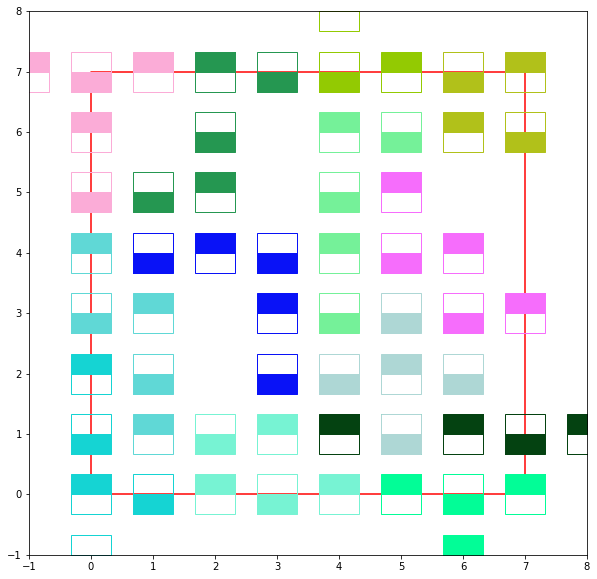

In [169]:
#plot_blocks(move_blocks(result[0].chromosome))
plot_blocks(move_blocks([269,449,187,2,337,59,307,383,228,27,201,508,479]))

In [7]:
result

NameError: name 'result' is not defined